## STUDENT PERFORMANCE INDICATOR

#### Life Cycle of Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- EDA
- Data Pre-Processing
- Model Training
- Choose Best Model

### 1) Problem Statement 
- This project understands how a student's performance, i.e, their Test Scores are affected by other factors/variables such as Gender, Ethnicity, Parental Level of Education, Lunch & Test Preparation Course

### 2) Data Collection
- Dataset Source -  https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977 
- The data consists of 8 columns 1000 rows.

### 2.1 Import Data and Required Packages
#### Importing Pandas, NumPy, Matplotlib, Seaborn & Warnings Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of Dataset

In [6]:
df.shape

(1000, 8)

### 2.2 Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3) Data Checks to Perform
- Check Missing Values
- Check Duplicates
- Check Data Type
- Check number of unique values in each column
- Check statistics of data set
- Check various categories present in the different categorical column


### 3.1) Check Missing Values

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### No missing or null values in dataset

### 3.2 Check Duplicates

In [8]:
df.duplicated().sum()

0

#### No duplicates in dataset

### 3.3 Check Data Types

In [11]:
df.dtypes
#df.info()  # checks null and dtypes together

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

### 3.4 Number of Unique Values in each column

In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of dataset

In [14]:
df.describe() # Numerical Columns

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insights
- Reading has the best average indicating it performed the best, although they are all close.
- Standard Deviation is also close suggesting there are similar spreads of dispersion.
- Maths had minimum score(s) of 0, while Reading & Writing did not. They all row(s) where full marks was achieved.

### 3.6 Exploring Data

In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
# List of responses for certain columns
print("categories in 'gender' column: ", df['gender'].unique()  )
print("categories in 'race_ethinicity':  ", df['race_ethnicity'].unique())
print("categories in 'parental_level_of_education':  ", df['parental_level_of_education'].unique())
print("categories in 'lunch':  ", df['lunch'].unique())


categories in 'gender' column:  ['female' 'male']
categories in 'race_ethinicity':   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education':   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch':   ['standard' 'free/reduced']


In [33]:
# Are columns Numerical or Categorical
numerical_columns = [column for column in df.columns if df[column].dtype != 'O']
categorical_columns = [column for column in df.columns if df[column].dtype == 'O']

print('We have', len(numerical_columns), 'numerical columns:', numerical_columns  )
print('We have', len(categorical_columns), 'categorical columns:', categorical_columns)

We have 3 numerical columns: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.7 Adding Columns for 'Total Score' & 'Average'

In [4]:
# We have 3 scores: Math, Reading & Writing.

df['total_score'] = df['reading_score'] + df['writing_score'] + df['math_score']
df['average'] = df['total_score']/3

df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [5]:
# How many students scored full marks for each test
reading_full = (df['reading_score']==100).sum()
writing_full = (df['writing_score']==100).sum()
math_full = (df['math_score']==100).sum()

print('Number of Students with full marks in Reading:',reading_full)
print('Number of Students with full marks in Writing:',writing_full)
print('Number of Students with full marks in Math:',math_full)

Number of Students with full marks in Reading: 17
Number of Students with full marks in Writing: 14
Number of Students with full marks in Math: 7


In [6]:
# How many students scored below 20 in each test
reading_less_20 = (df['reading_score'] < 20).sum()
writing_less_20 = (df['writing_score']< 20).sum()
math_less_20 = (df['math_score']< 20).sum()

print('Number of Students with less than 20 marks in Reading:',reading_less_20)
print('Number of Students with less than 20 marks in Writing:',writing_less_20)
print('Number of Students with less than 20 marks in Math:',math_less_20)

Number of Students with less than 20 marks in Reading: 1
Number of Students with less than 20 marks in Writing: 3
Number of Students with less than 20 marks in Math: 4


##### Insights
- Students have performed the worst in Maths 
- Students performed the best in Reading

### 4) Exploring Data (Visualisation)

### 4.1 Visualise average score distribution
#### Using Historgram & KDE's

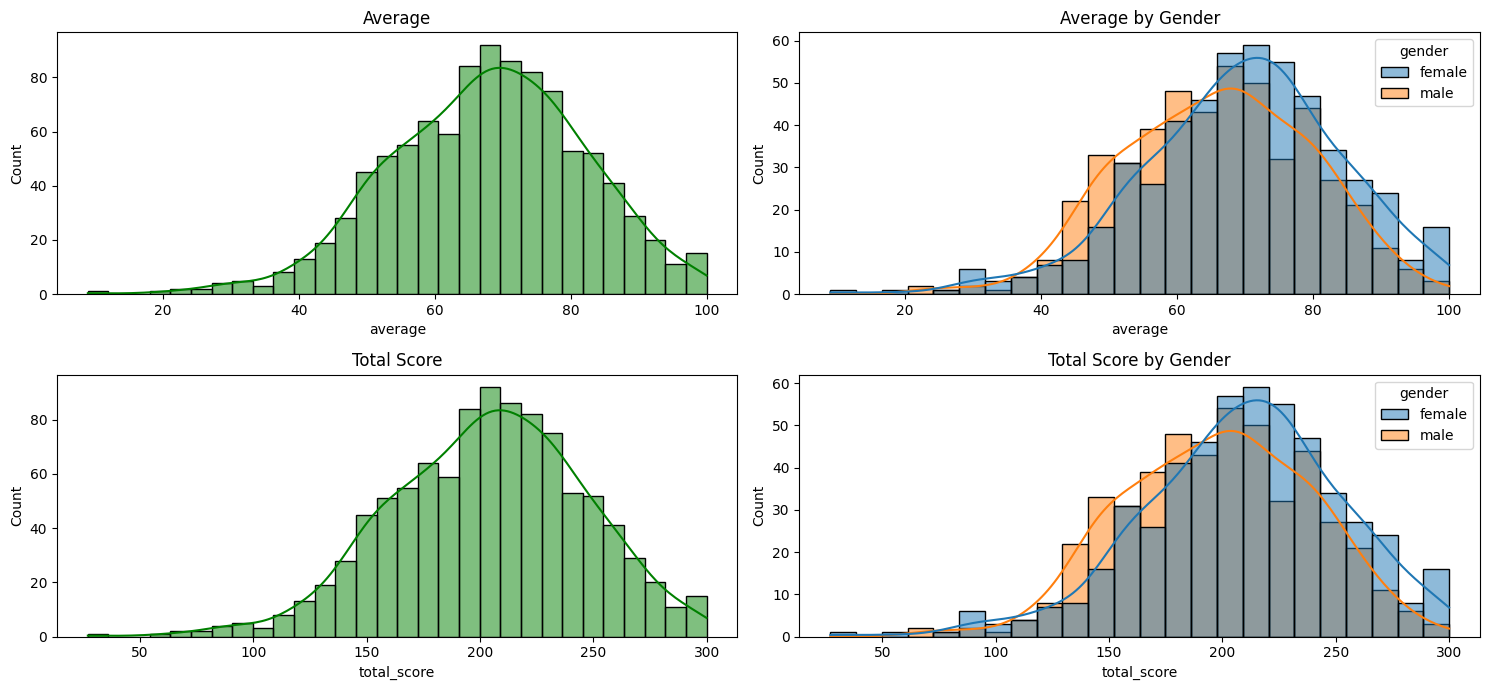

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

plt.subplot(221)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.title('Average')

plt.subplot(222)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.title('Average by Gender')

plt.subplot(223)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.title('Total Score')

plt.subplot(224)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.title('Total Score by Gender')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

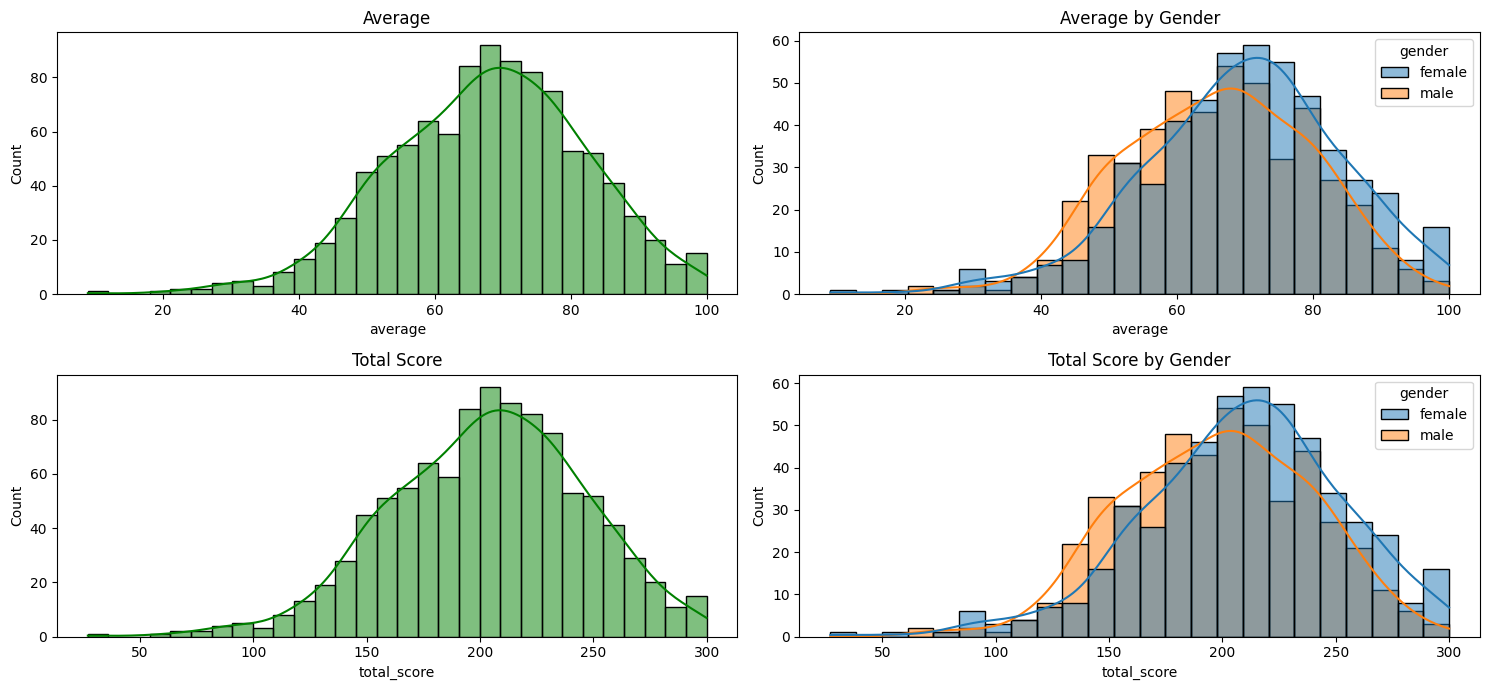

In [84]:
# DIFFERENT WAY OF DOING SAME THING (More efficient)
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

# First subplot (top-left)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0, 0])
axs[0, 0].set_title('Average')

# Second subplot (top-right)
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[0, 1])
axs[0, 1].set_title('Average by Gender')

# Third subplot (bottom-left)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g', ax=axs[1, 0])
axs[1, 0].set_title('Total Score')

# Fourth subplot (bottom-right)
sns.histplot(data=df, x='total_score', kde=True, hue='gender', ax=axs[1, 1])
axs[1, 1].set_title('Total Score by Gender')

plt.tight_layout()
plt.show()


##### Insights
- Female students tend to do better than male students

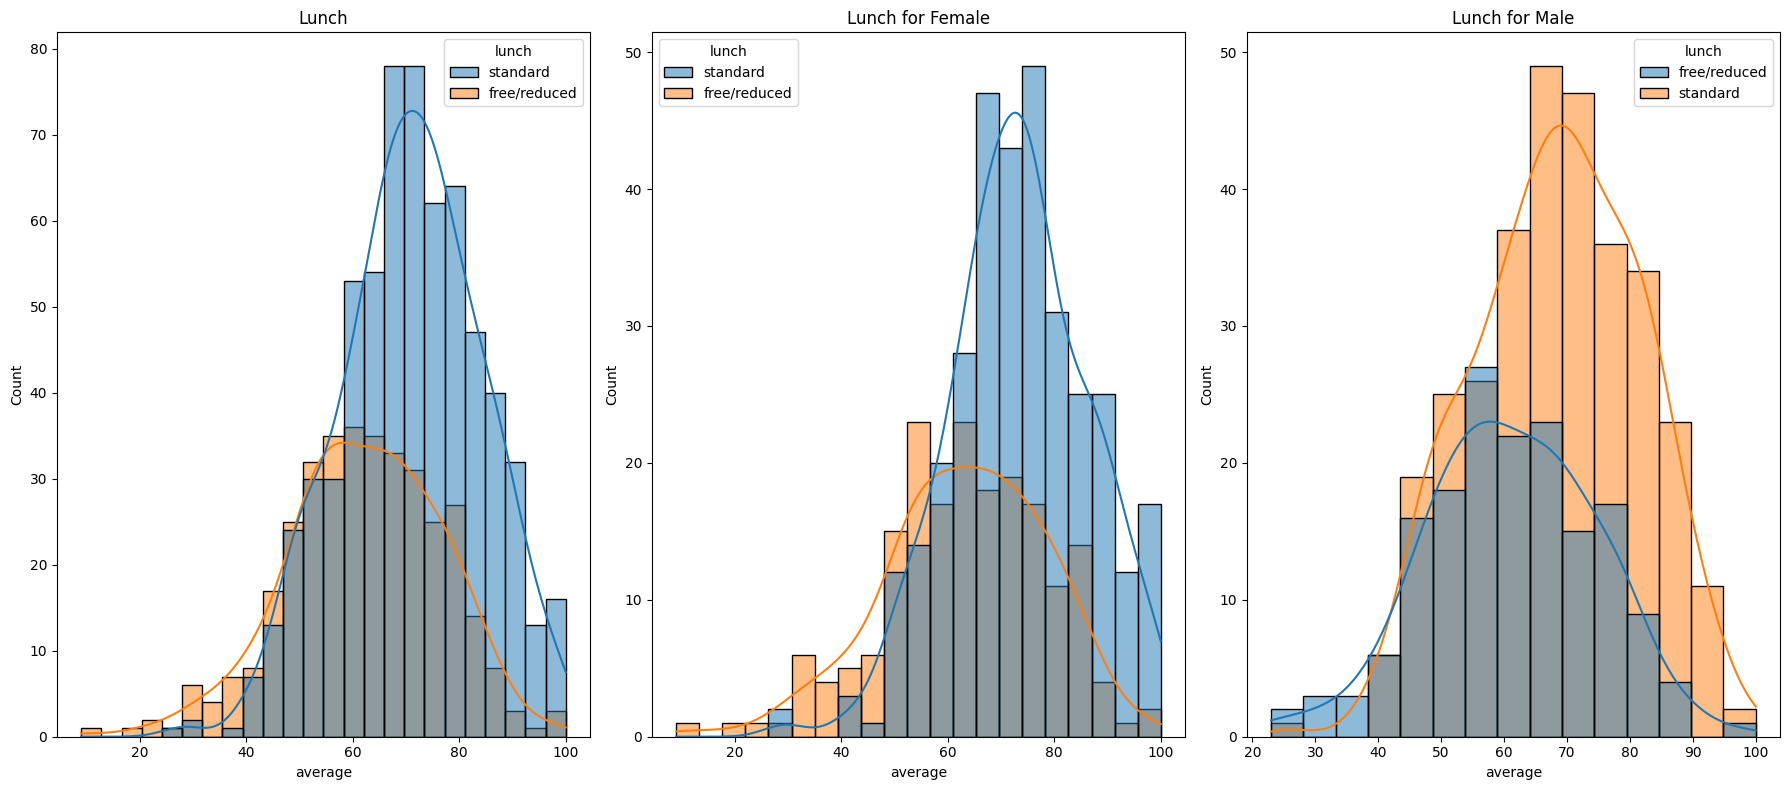

In [8]:
## Looking at Lunch now
fig, axs = plt.subplots(1,3,figsize=(18,8))

sns.histplot(data=df,x='average',kde=True,hue='lunch', ax=axs[0])
axs[0].set_title('Lunch')

sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch', ax=axs[1])
axs[1].set_title('Lunch for Female')

sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch',ax=axs[2])
axs[2].set_title('Lunch for Male')

plt.tight_layout()
plt.show()

##### Insights 
- Standard Lunch students perform well in scores, for both Females & Males

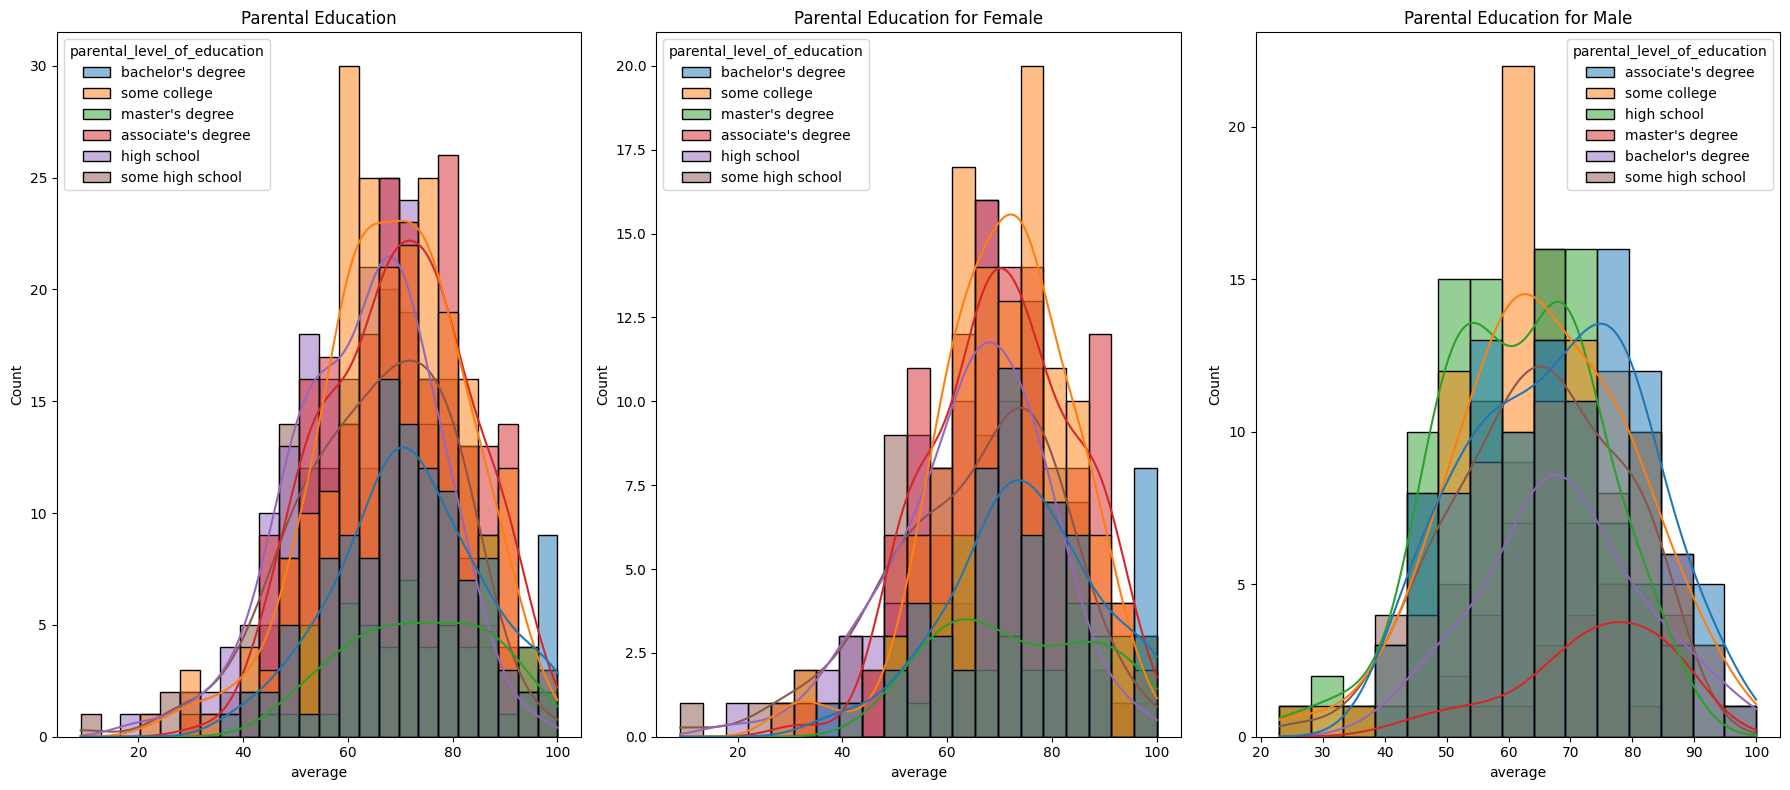

In [97]:
## Looking at Parental Education now
fig, axs = plt.subplots(1,3,figsize=(18,8))

sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education', ax=axs[0])
axs[0].set_title('Parental Education')

sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education', ax=axs[1])
axs[1].set_title('Parental Education for Female')

sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education',ax=axs[2])
axs[2].set_title('Parental Education for Male')

plt.tight_layout()
plt.show()

##### Insights
- 1st plot shows that, generally higher levels of parental education does not necessarily help students perform better in tests.
- 2nd plot shows this is the case for female students.
- 3rd plot indicates that parental education of level associate or masters degree tend to lead to better performance in scores for male students.

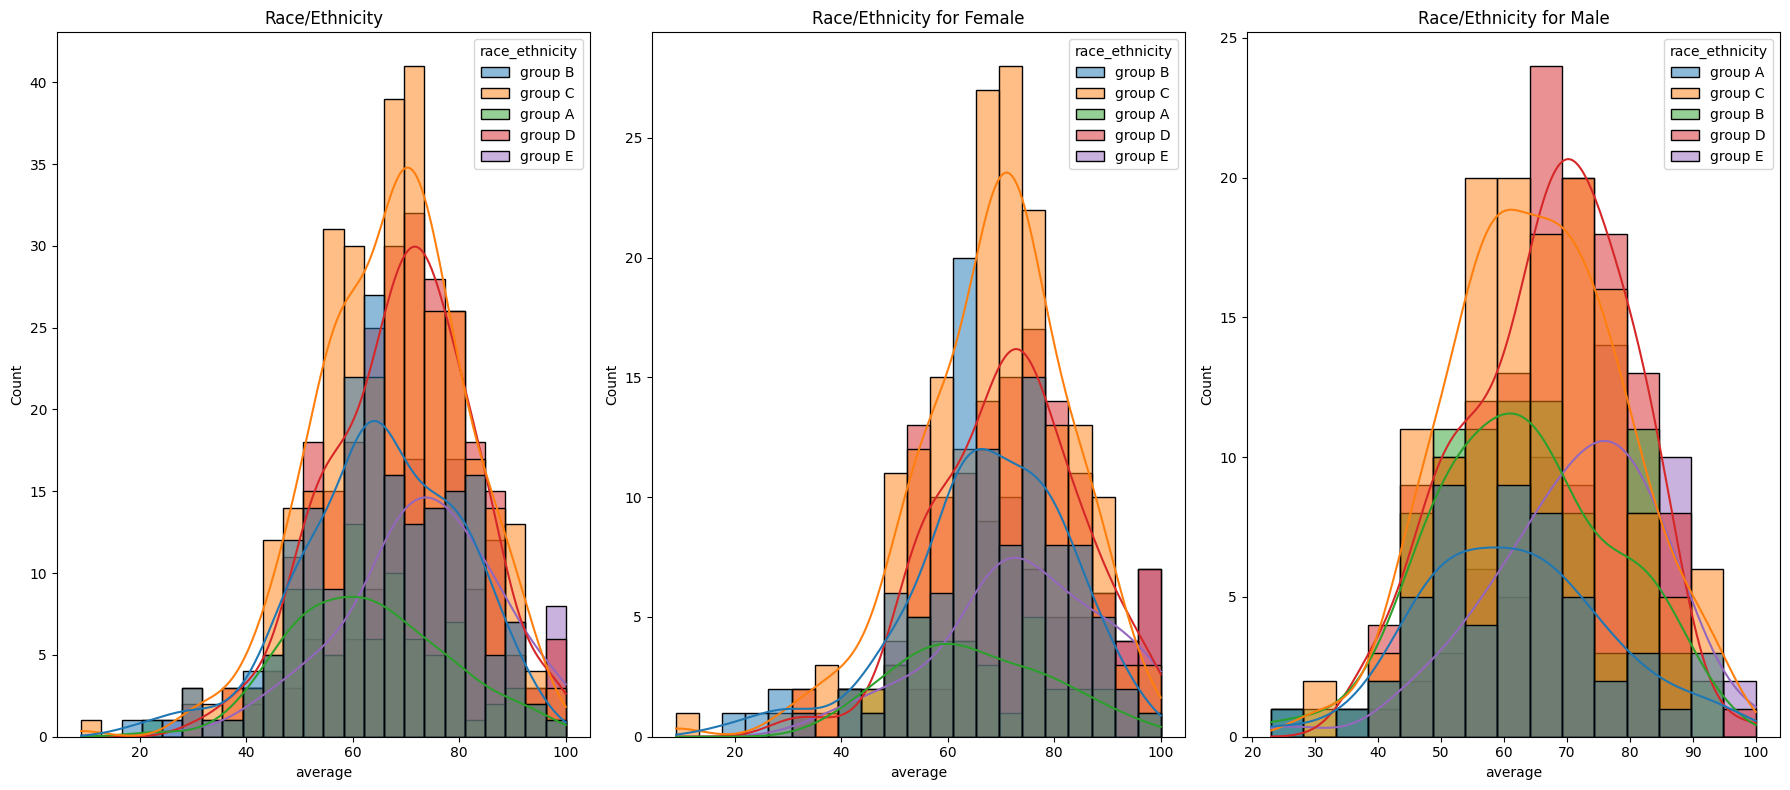

In [98]:
## Looking at Race/Ethnicity now
fig, axs = plt.subplots(1,3,figsize=(18,8))

sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity', ax=axs[0])
axs[0].set_title('Race/Ethnicity')

sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity', ax=axs[1])
axs[1].set_title('Race/Ethnicity for Female')

sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity',ax=axs[2])
axs[2].set_title('Race/Ethnicity for Male')

plt.tight_layout()
plt.show()


##### Insights
- Students within Group A & Group B tend to perform poorly when compared with the other groups.
- This is the case for both Female & Male students. Although for Male students, Group C also performs relatively poorly.

### 4.2 Maximum Score of Students in all 3 subjects

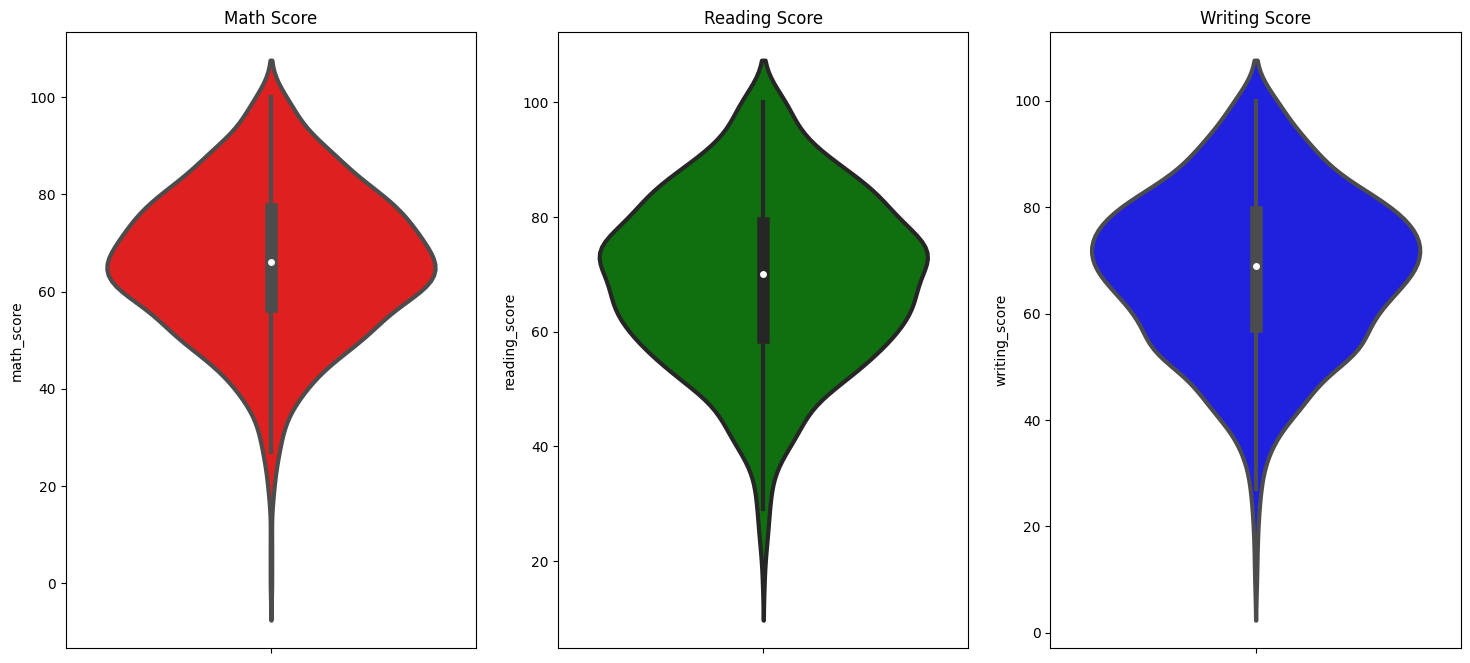

In [102]:

fig, axs = plt.subplots(1,3,figsize=(18,8))

sns.violinplot(y='math_score',data=df,color='red',linewidth=3,ax=axs[0])
axs[0].set_title('Math Score')

sns.violinplot(y='reading_score',data=df,color='green',linewidth=3,ax=axs[1])
axs[1].set_title('Reading Score')

sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3,ax=axs[2])
axs[2].set_title('Writing Score')

plt.show()

##### Insights 
- Looking closely at the 3 graphs we can see that scores for Maths were more around 60-80, whereas Reading & Writing had scores between 50-80

### 4.3 Multivariate Analysis using Pie Charts

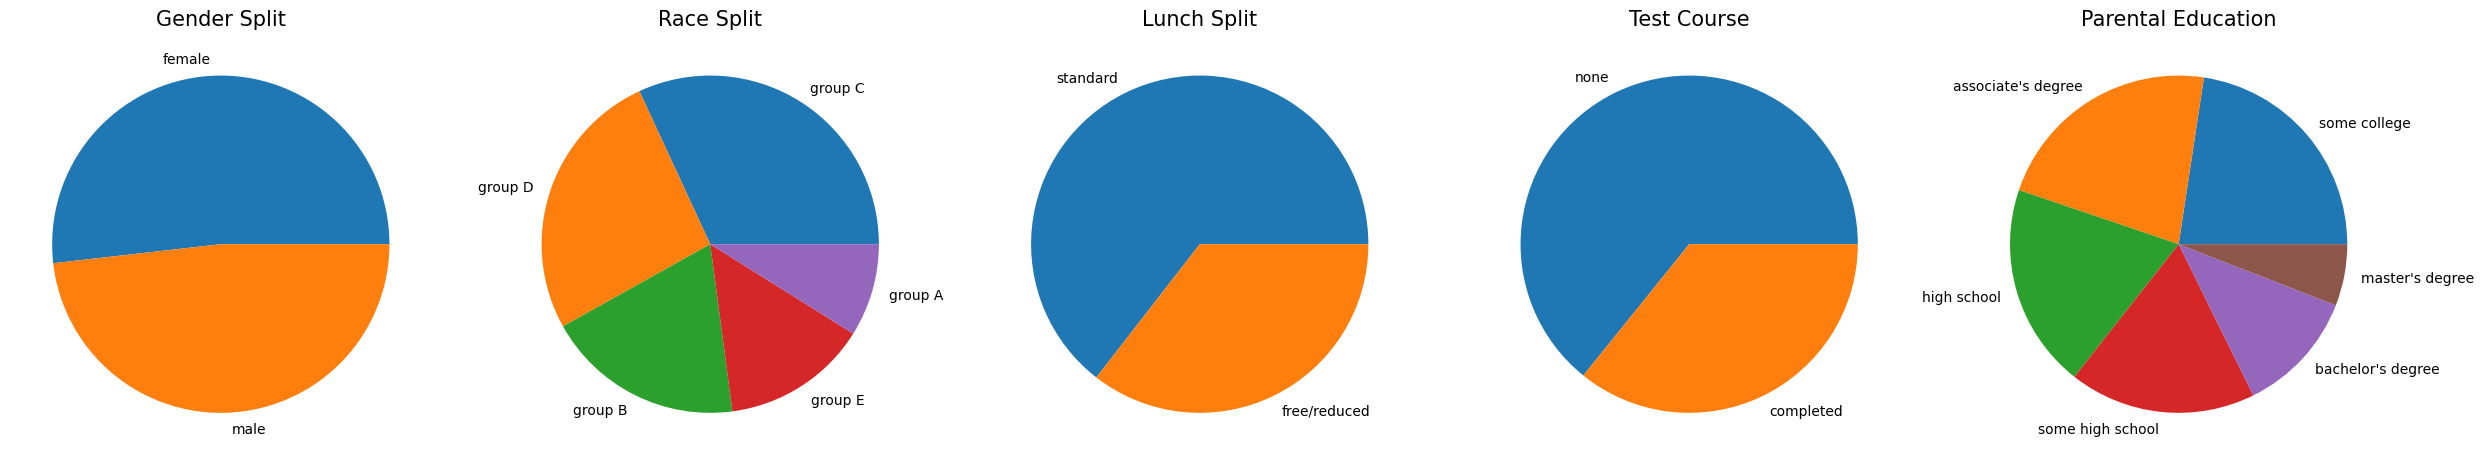

In [141]:
fig, axs = plt.subplots(1,5, figsize=(25,5))

# Gender Pie Chart
gender = df['gender'].value_counts()
axs[0].pie(gender,labels=gender.index)
axs[0].set_title('Gender Split', fontsize=15)

# Race/Ethnicity Pie Chart
race = df['race_ethnicity'].value_counts()
axs[1].pie(race,labels=race.index)
axs[1].set_title('Race Split', fontsize=15)

# Lunch Pie Chart
lunch = df['lunch'].value_counts()
axs[2].pie(lunch,labels=lunch.index)
axs[2].set_title('Lunch Split', fontsize=15)

# Test Preparation Pie Chart
test = df['test_preparation_course'].value_counts()
axs[3].pie(test,labels=test.index)
axs[3].set_title('Test Course', fontsize=15)

# Parental Education
parent = df['parental_level_of_education'].value_counts()
axs[4].pie(parent,labels=parent.index)
axs[4].set_title('Parental Education', fontsize=15)


plt.tight_layout()
plt.show()

#### Insights 
- Male to Female ratio is almost equal
- Group C has most students with Group A the least
- Standard Lunch is higher than the other
- More people haven't completed test preparation than those that have

### 4.4 Feature Wise Visualisation

#### 4.4.1 Gender Column
- How is distribution of Gender?
- Does Gender have an impact on student performance?

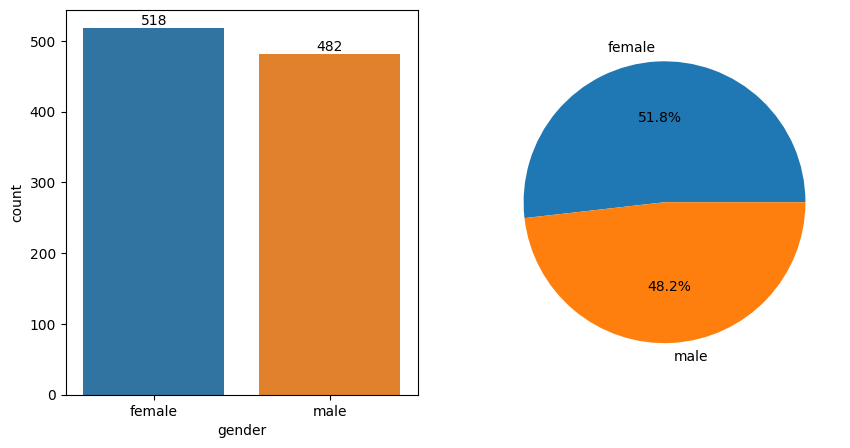

In [20]:
# How is Gender Distribution
fig, axs = plt.subplots(1,2, figsize = (10,5))

#axs[0].bar(df['gender'].value_counts().index, df['gender'].value_counts(), color=['red', 'blue'])
sns.countplot(x=df['gender'],data=df,ax=axs[0])
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=10)

axs[1].pie(df['gender'].value_counts(),labels=df['gender'].value_counts().index,autopct='%1.1f%%')

plt.show()

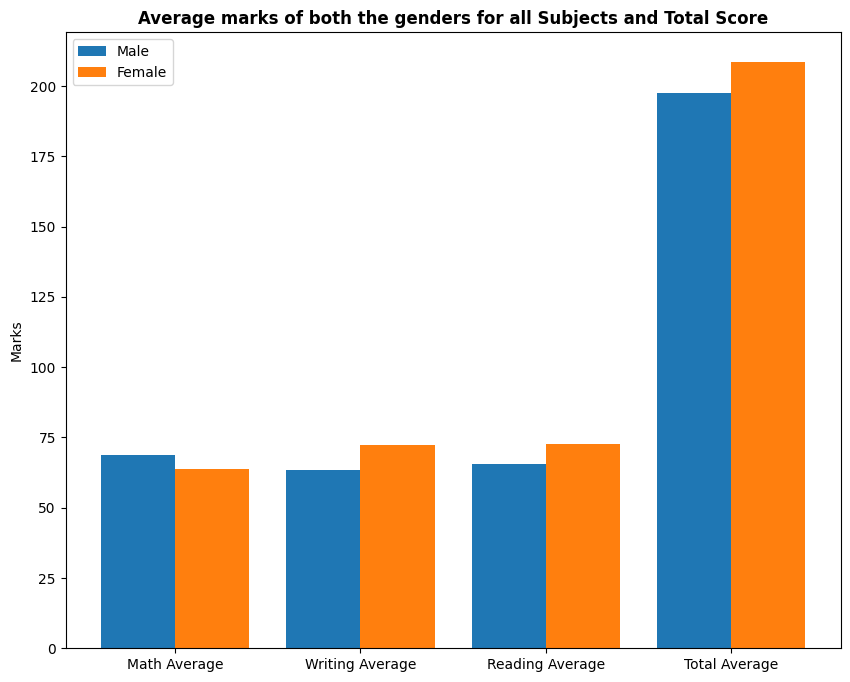

In [189]:
# Does Gender have an impact on student performance?
gender_group = df.groupby('gender')[['math_score','writing_score','reading_score','total_score']].mean()
female_scores = [gender_group['math_score'][0], gender_group['writing_score'][0], gender_group['reading_score'][0], gender_group['total_score'][0]]
male_scores  = [gender_group['math_score'][1], gender_group['writing_score'][1], gender_group['reading_score'][1], gender_group['total_score'][1]]

plt.figure(figsize=(10, 8))

X = ['Math Average','Writing Average','Reading Average','Total Average']

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Average marks of both the genders for all Subjects and Total Score", fontweight='bold')
plt.legend()
plt.show()

#### Insights
- Females perform better in all subjects and have a better Total Score as well apart from Maths where males perform better

#### 4.4.2 Race/Ethnicity Column
- How is distribution of Race Groups?
- Does Race/Ethnicity have an impact on student performance?

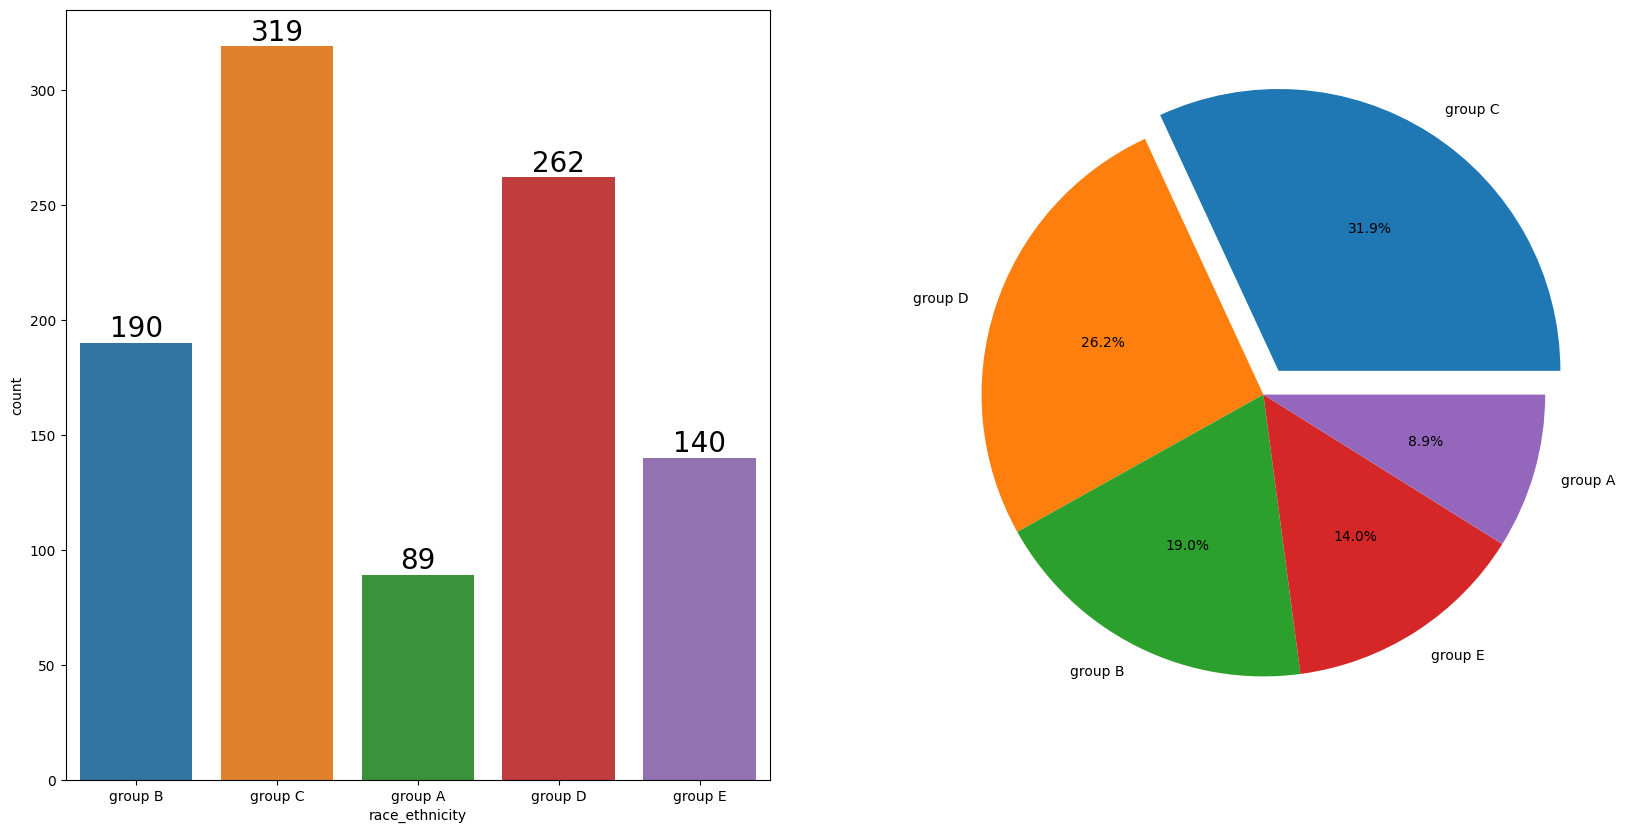

In [19]:
# How is Race/Ethnicity distribution
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%')
plt.show()   

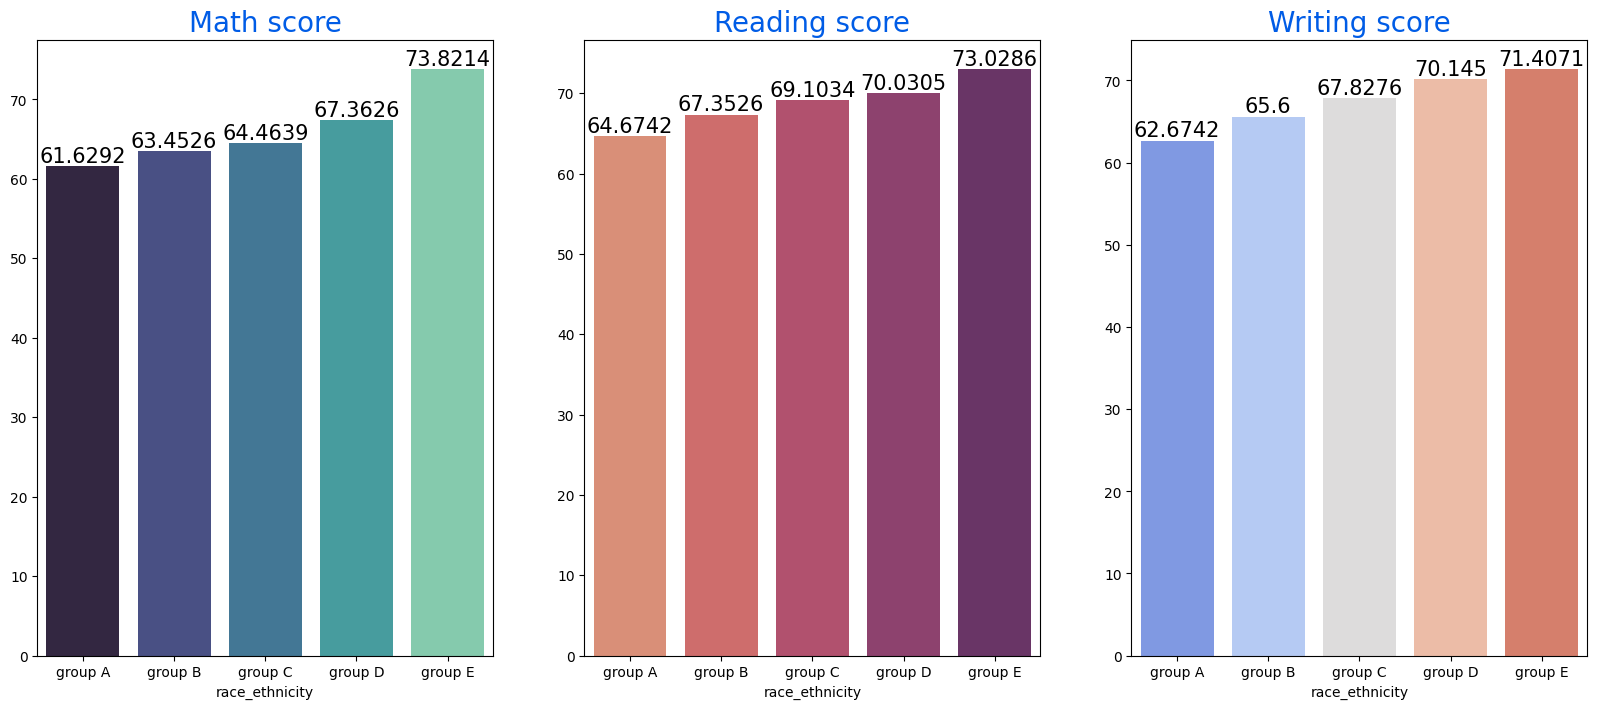

In [9]:
# Does Race/Ethnicity have an impact on Student Performance
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
- Group E students have performed the best in all subjects
- Group A students have performed the worst in all subjects

#### 4.4.3 Parental Education Column
- What is Parental Education of students?
- Does Parental Education have an impact on student performance?

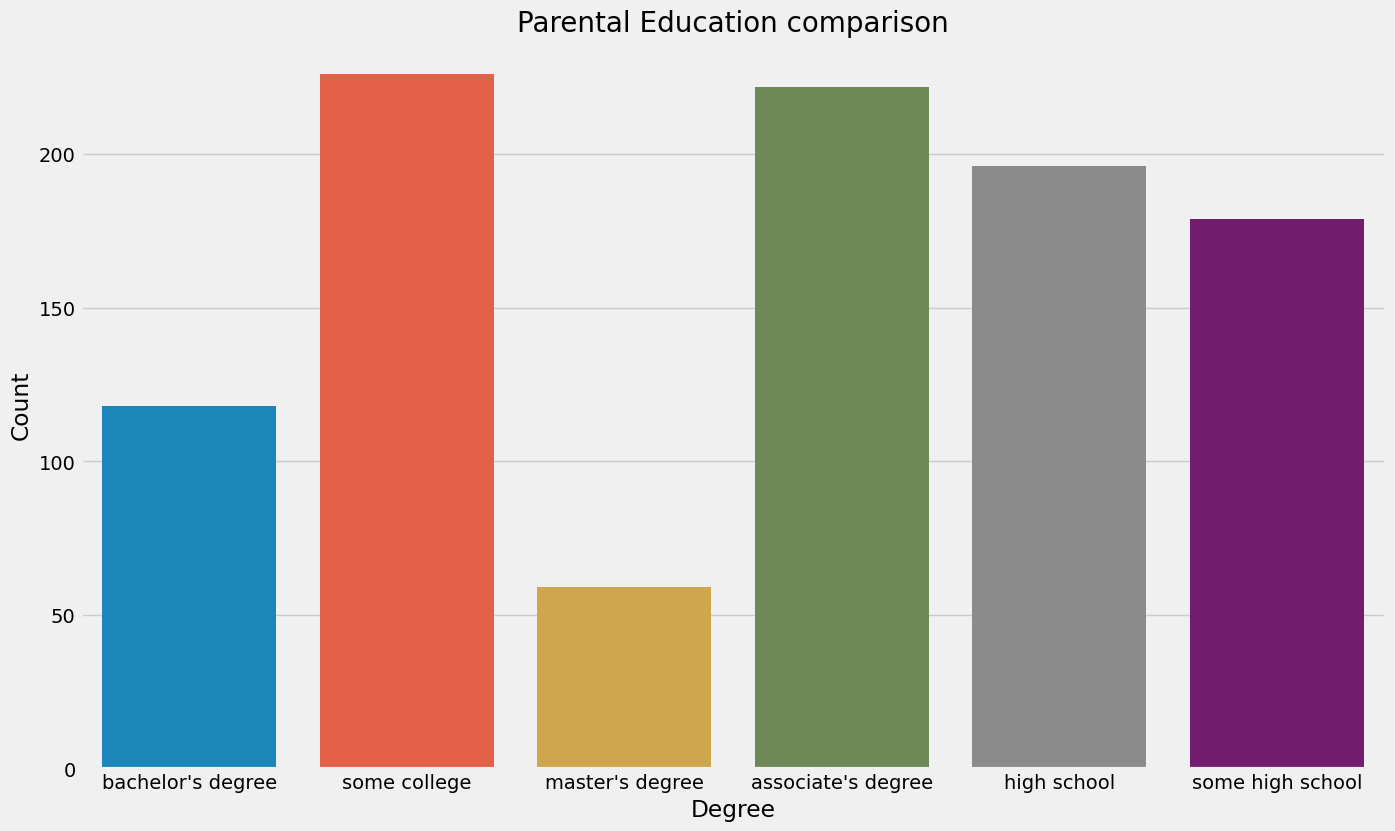

<Figure size 1500x900 with 0 Axes>

In [27]:
# What is Parental Education of Students?
sns.countplot(x=df['parental_level_of_education'])
plt.title('Parental Education comparison', fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.figure(figsize=(15,9))
plt.show()


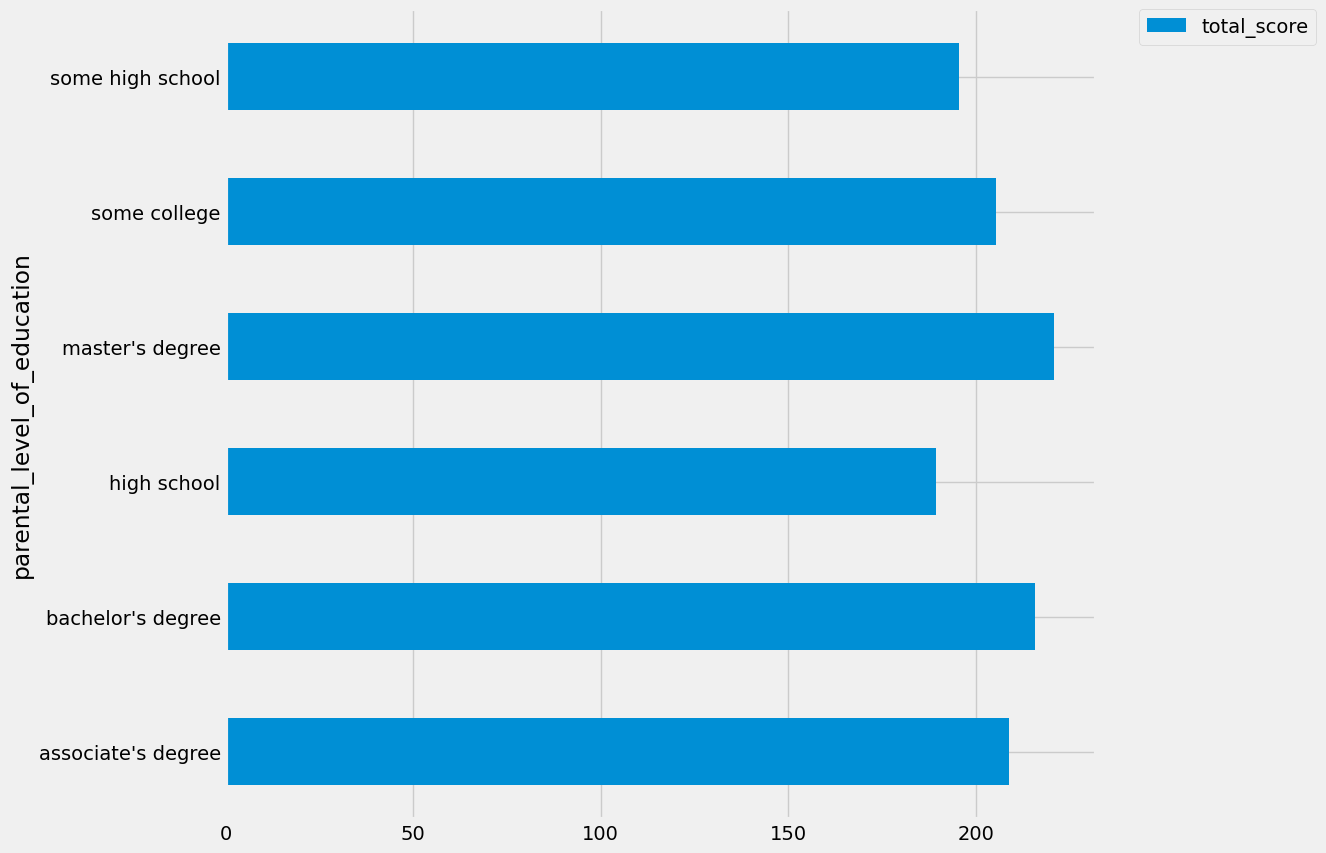

In [35]:
# Does Parental Education have an impact on student performance?
df.groupby('parental_level_of_education').agg({'total_score': 'mean'}).plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights
- Students who's parents have masters or bachelors degree level of education have higher scores than others.

#### 4.4.4 Lunch Column
- What Lunch is most common amongst students?
- Does Lunch have an impact on student performance?

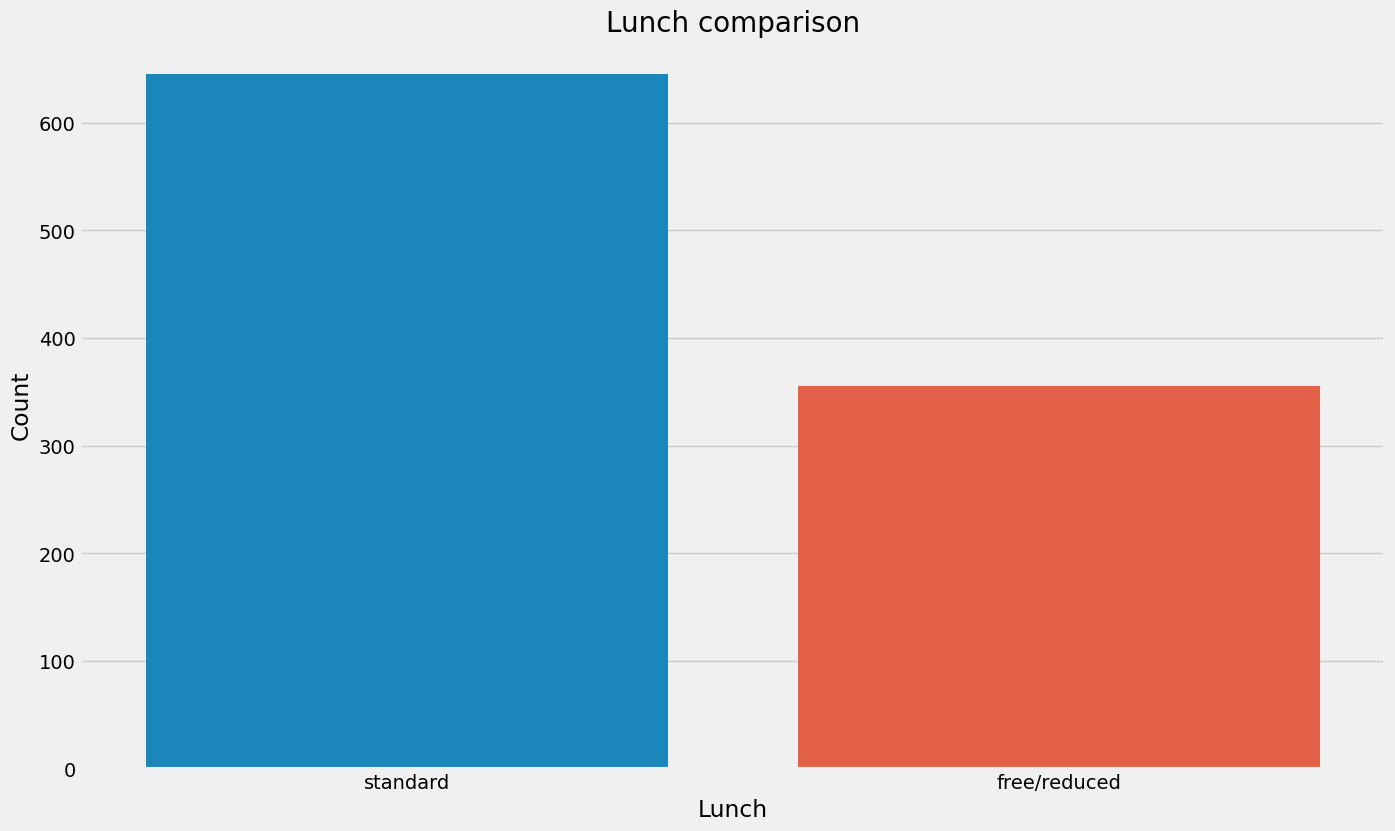

<Figure size 1000x500 with 0 Axes>

In [57]:
# What type of lunch is most common?
sns.countplot(x=df['lunch'])
plt.title('Lunch comparison', fontsize=20)
plt.xlabel('Lunch')
plt.ylabel('Count')
plt.figure(figsize=(10,5))
plt.show()

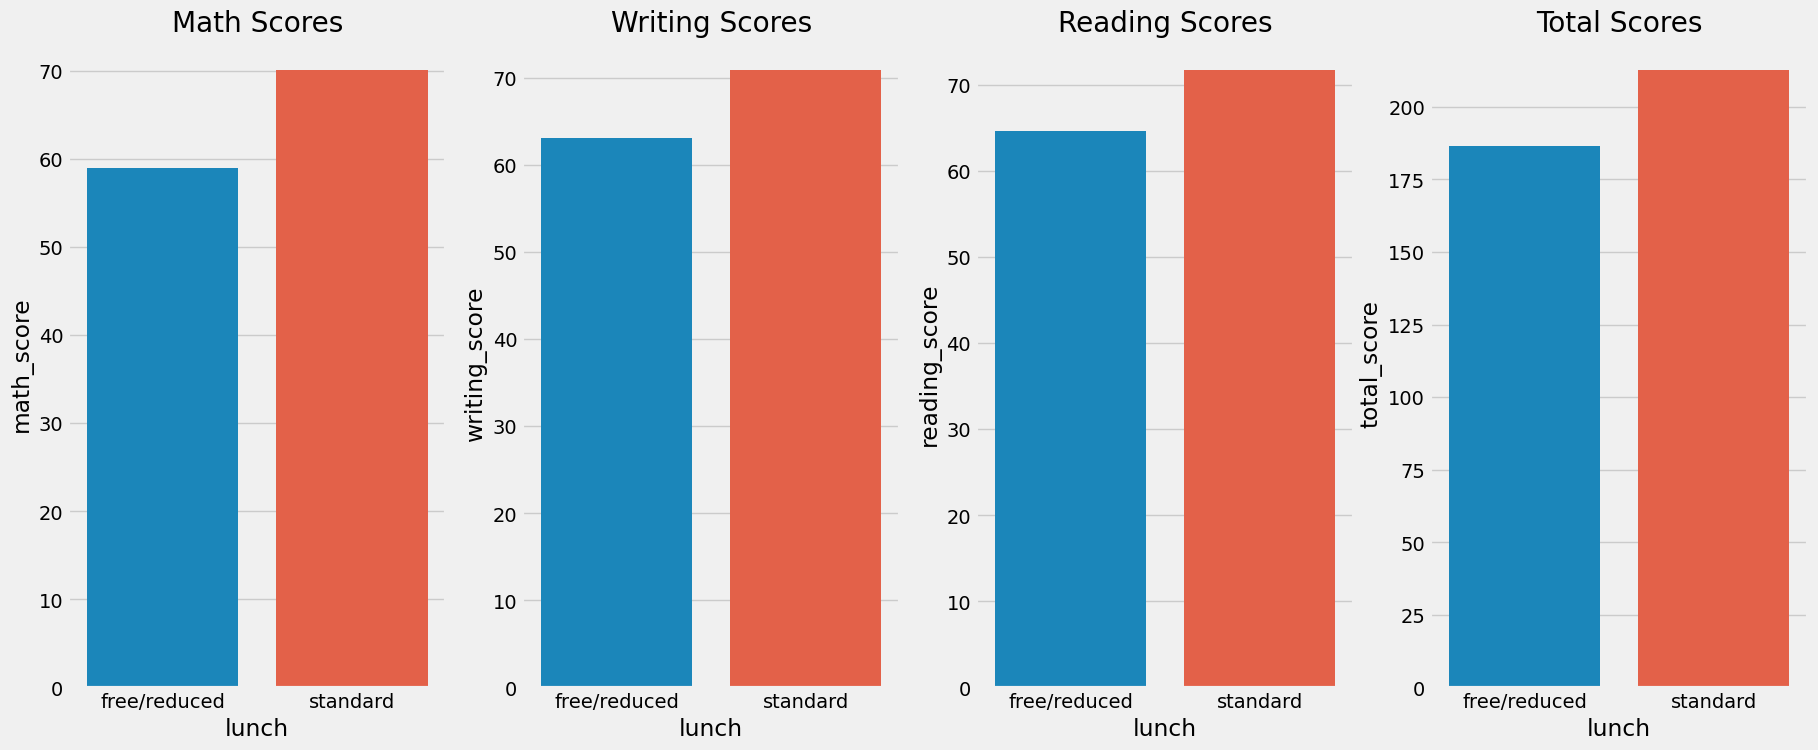

In [56]:
# Does Lunch have an impact on student performance?
fig, axs = plt.subplots(1,4,figsize=(20,8))

lunch = df.groupby('lunch')[['math_score','writing_score','reading_score','total_score']].mean()

#axs[0].bar(lunch.index,lunch['math_score'])
sns.barplot(x=lunch.index,y=lunch['math_score'], ax=axs[0])
axs[0].set_title('Math Scores')

sns.barplot(x=lunch.index,y=lunch['writing_score'], ax=axs[1])
axs[1].set_title('Writing Scores')

sns.barplot(x=lunch.index,y=lunch['reading_score'], ax=axs[2])
axs[2].set_title('Reading Scores')

sns.barplot(x=lunch.index,y=lunch['total_score'], ax=axs[3])
axs[3].set_title('Total Scores')

plt.show()

#### Insights
- Students who get Standard lunch perform better than students who get free/reduced lunch

#### 4.4.5 Test Preparation Column
- Does Test Preparation have an impact on student performance?

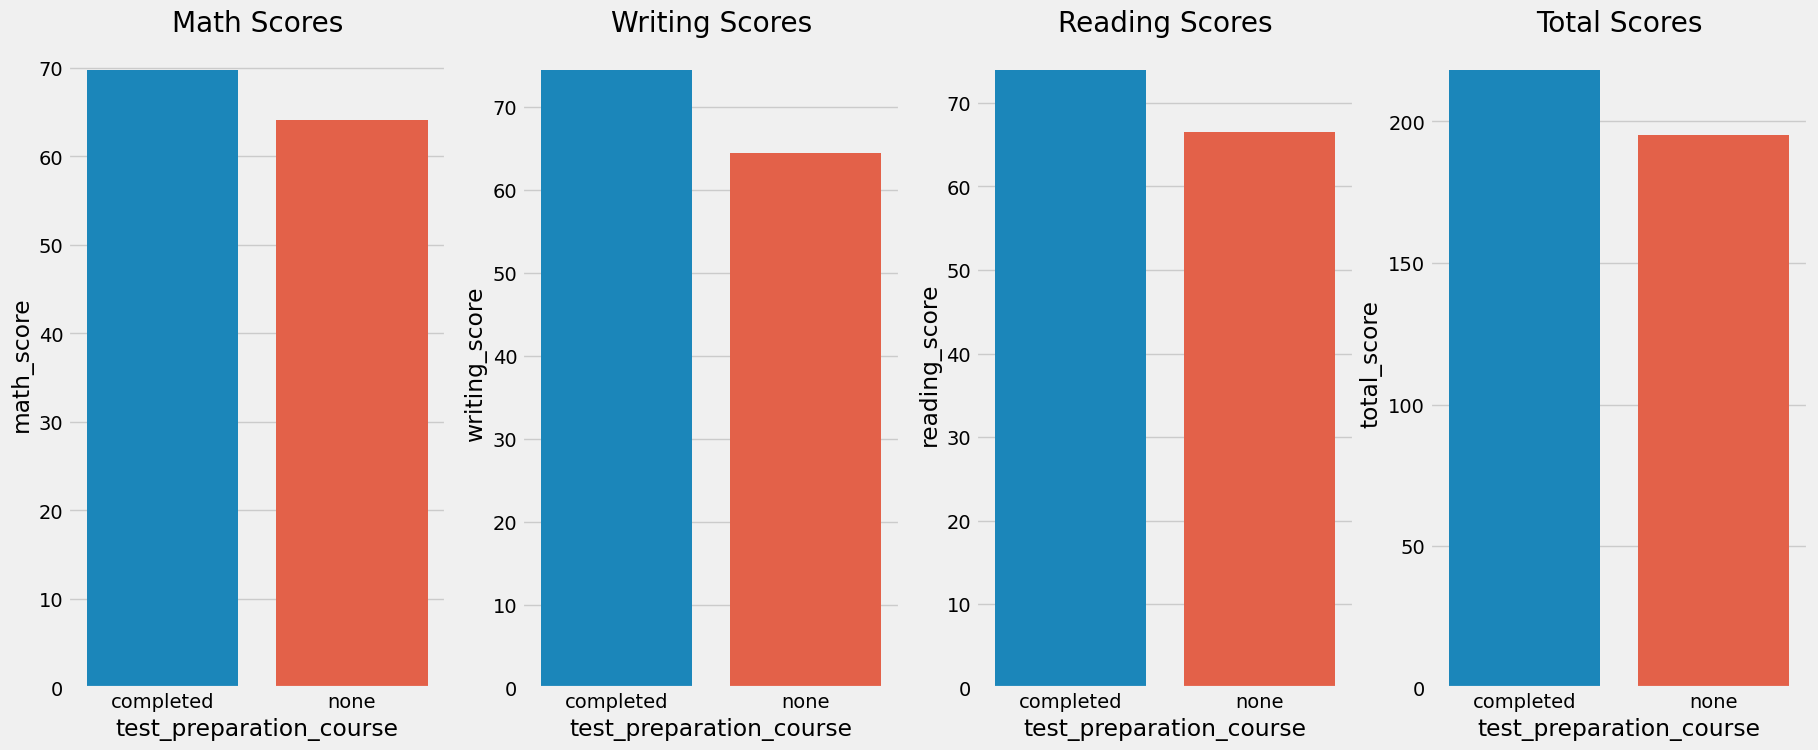

In [59]:
# Does Test Preparation have an impact on student performance?
fig, axs = plt.subplots(1,4,figsize=(20,8))

lunch = df.groupby('test_preparation_course')[['math_score','writing_score','reading_score','total_score']].mean()

#axs[0].bar(lunch.index,lunch['math_score'])
sns.barplot(x=lunch.index,y=lunch['math_score'], ax=axs[0])
axs[0].set_title('Math Scores')

sns.barplot(x=lunch.index,y=lunch['writing_score'], ax=axs[1])
axs[1].set_title('Writing Scores')

sns.barplot(x=lunch.index,y=lunch['reading_score'], ax=axs[2])
axs[2].set_title('Reading Scores')

sns.barplot(x=lunch.index,y=lunch['total_score'], ax=axs[3])
axs[3].set_title('Total Scores')

plt.show()

#### Insights
- Students who have completed Test Preparation Course perform better than those who have not

#### 4.4.6 Checking Outliers

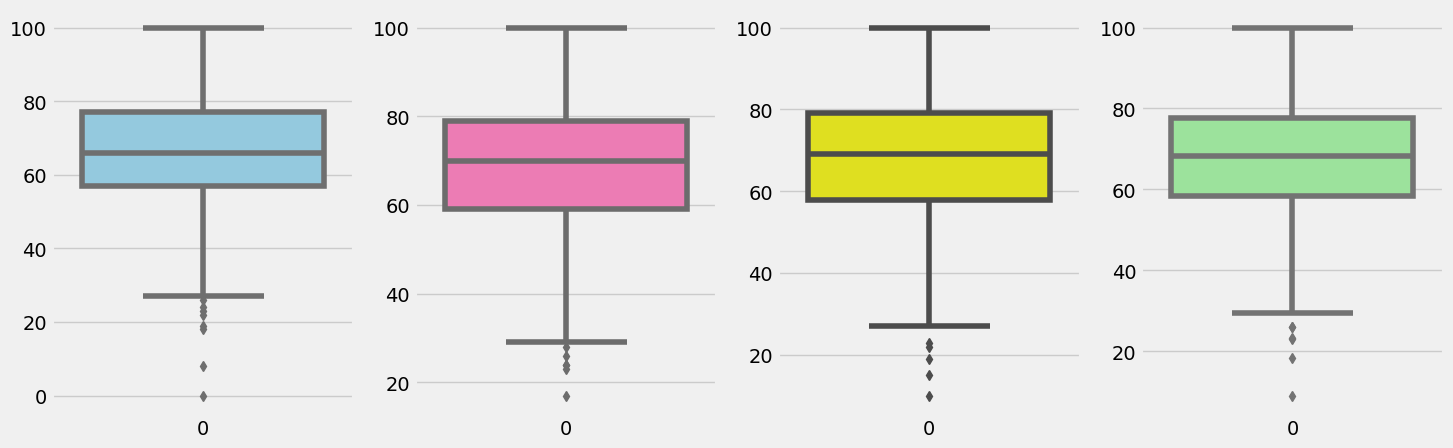

In [61]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 Pairplot

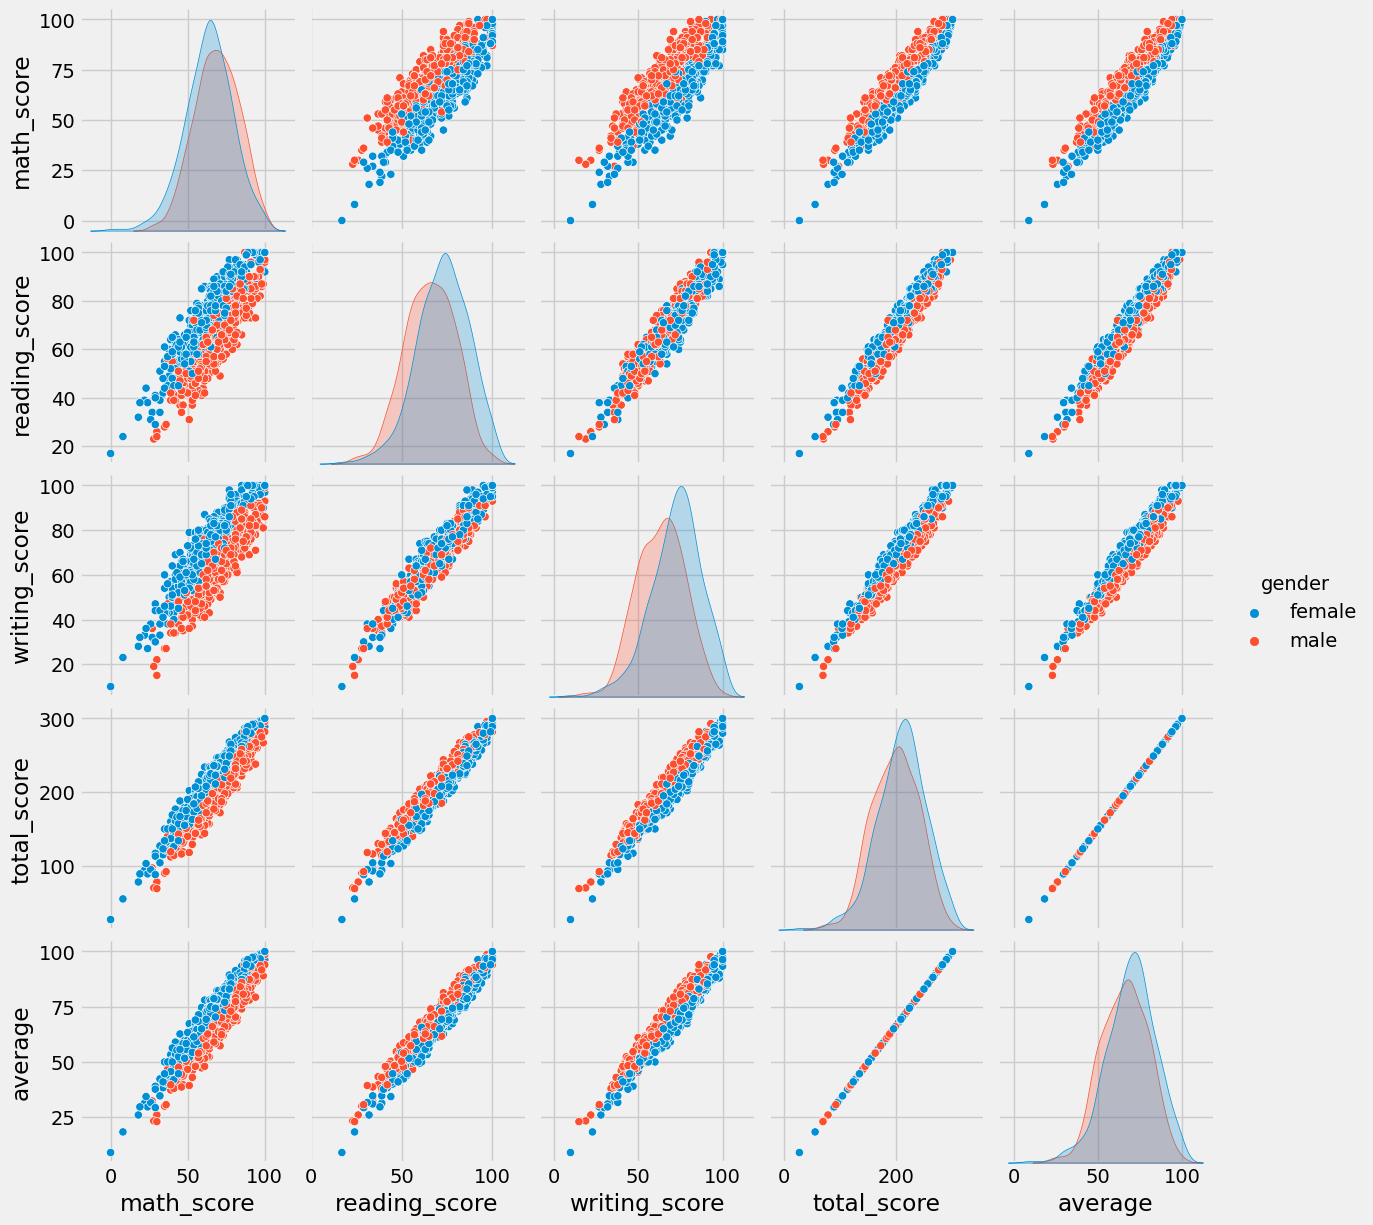

In [62]:
sns.pairplot(df,hue = 'gender')
plt.show()